# SMD-Übungszettel Nr.1



## Aufgabe 1 

### Aufgabenteil a)

In [33]:
import numpy as np

import matplotlib.pyplot as plt

import scipy

from scipy.optimize import newton, brentq, minimize

Definiere die in der Aufgabe gegeben Funktionen

In [2]:
def f(x): 
    return (x**3 + 1/3) - (x**3 - 1/3)

def g(x):
    return ( (3 + x**3/3) - (3 - x**3/3)) / x**3


Definiere die exakten Werte $f_0$ und $g_0$ der Gleichungen:

In [3]:
f_0 = 2/3
g_0 = 2/3

Führe den relativen Fehler ein

In [4]:
def rel_error(x_0, x_num):
    return ( np.abs(x_0 - x_num) / np.abs(x_0) )

Lege den Definititionsbereich fest und plotte den relativen Fehler

In [5]:
x = np.logspace(-7,7, 1e6)

#### Ergebnisse für f(x)

In [6]:
rel_error_array_f = rel_error(f_0, f(x))

# x_values where the relative error is smaller than 1%
x_where_rel_err_lower_1per_f = x[rel_error_array_f <= 0.1]

# Getting the last element of the list because I want to upper limit
print('x value where the relative error is 1%:',int(x_where_rel_err_lower_1per_f[-1]), '\n')

# x_values where the relative error is one, this equal to f(x) = 0.
x_where_rel_err_is_one_f = x[rel_error_array_f == 1]

# Getting the first element of the list beacause I want the lower limit
print('x value where the relative error is 1, this is equal to f(x) = 0:',int(x_where_rel_err_is_one_f[0]))




x value where the relative error is 1%: 82568 

x value where the relative error is 1, this is equal to f(x) = 0: 165140


#### Ergebnis für g(x)

In [7]:
rel_error_array_g = rel_error(g_0, g(x))

# x_values where the relative error is smaller than 1%
x_where_rel_err_lower_1per_g = x[rel_error_array_g <= 0.1]

# Getting the last element of the list because I want to upper limit
print('x value where the relative error is 1%:',x_where_rel_err_lower_1per_g[0], '\n')

# x_values where the relative error is one, this equal to f(x) = 0.
x_where_rel_err_is_one_g = x[rel_error_array_g == 1]

# Getting the first element of the list beacause I want the lower limit
print('x value where the relative error is 1, this is equal to f(x) = 0:',x_where_rel_err_is_one_g[-1])

x value where the relative error is 1%: 1.06594311238701e-05 

x value where the relative error is 1, this is equal to f(x) = 0: 8.733452070893184e-06


## Aufgabenteil b)

Plotte die relativen Fehler und führe zusätzlich noch die Grenzen mit ein.

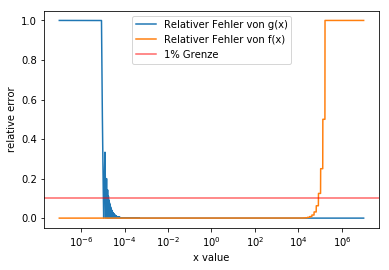

In [8]:
plt.plot(x,rel_error_array_g, label = 'Relativer Fehler von g(x)')
plt.plot(x,rel_error_array_f, label = 'Relativer Fehler von f(x)')

plt.axhline(0.1, color = 'r', alpha = 0.6, label = '1% Grenze')

plt.xscale('log')
plt.xlabel('x value')
plt.ylabel('relative error')

plt.legend()

plt.savefig('./results/A1_rel_error.pdf')
plt.show()


Was in dem Plot auffällt ist, dass $f(x)$ ungenau für große $x$ ist. Analog ist $g(x)$ 
ungenau für kleine $x$. 

__Erklärung für f(x):__
Bei großen Werten für $x$ vernachlässigt der Computer die $\frac{1}{3}$ und das Resultat ist $f(x)=0$.

__Erklärung für g(x):__
Bei sehr kleinen Werten für $x$ kommt es mit Zähler von g(x) zur Auslöschung, da $x^3$ noch kleiner wird. Weiterhin sind die Fluktuation (blau gefüllter Bereich), damit zu erklären, 
dass in $g(x)$ durch $x$ geteilt wird und somit sich der Term an einer Polstelle aufhält.

## Aufgabe 2

### Aufgabenteil a)

Verwende die Werte aus der Aufgabenstellung

In [9]:
E = 50e9 #in units of eV
me = 511e3 # in units of eV

In [10]:
def beta(energy, mass_of_electron):
    gamma = energy / mass_of_electron
    
    return np.sqrt( 1 - 1/gamma**2) 


In [11]:
def nenner(beta, theta):
    return 1 - beta**2 * np.cos(theta)**2

Numerische Instabilität ensteht unter anderem, wenn durch eine kleine Zeit geteilt wird. 
Aus diesem Grund schaue ich mir den Nenner des differntiellen Wirkungsquerschnitt $\sigma$ an.

Lege den Definitionsbereich für $\theta$ fest.

In [12]:
theta = np.linspace(0, 2*np.pi, 2e6)

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


1.0000000000006168 9574100918.31634


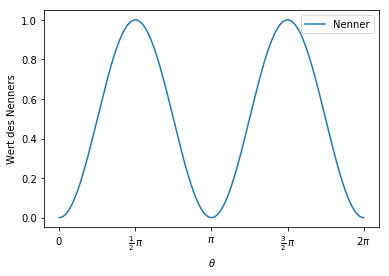

In [13]:
plt.plot(theta, nenner(beta(E, me), theta),label = 'Nenner')

print( 1/max( nenner(beta(E, me), theta)), 1/min( nenner(beta(E, me), theta)))

plt.xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2,  2 * np.pi],
           [r"$0$", r"$\frac{1}{2}\,\pi$", r"$\pi$", r"$\frac{3}{2}\,\pi$", r"$2\pi$"])
plt.ylabel('Wert des Nenners')
plt.xlabel(r'$\theta$')
plt.legend()

plt.savefig('./results/A2_nenner.pdf')

In der obigen Grafik ist deutlich zu erkennen dass der Nenner in Umgebung um $\theta=n\pi,\, n\in\mathbb{N}_0$ gegen Null strebt. In der Nähe der Polstellen ist der differentielle Wirkungsquerschnitt $\sigma$ numerisch instabil. Zusätzlich findet im Nenner eine Subtraktion gleich großer Zahlen statt.

In [14]:
def differntial_crosssection(energy, beta, theta):
    alpha = 1/137
    s = 4*energy**2
    
    return alpha**2 / s * ( (2 + np.sin(theta)**2 ) / ( 1 - beta**2 * np.cos(theta)**2 ) ) 

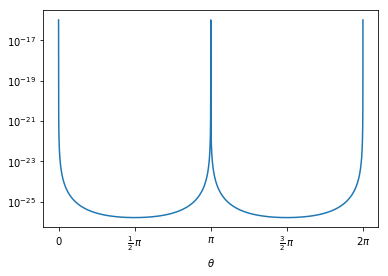

In [29]:
plt.plot(theta, differntial_crosssection(E, beta(E, me), theta))
plt.xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2,  2 * np.pi],
          [r"$0$", r"$\frac{1}{2}\,\pi$", r"$\pi$", r"$\frac{3}{2}\,\pi$", r"$2\pi$"])
plt.xlabel(r'$\theta$')
plt.yscale('log')
#plt.xlim(np.pi*0.9999, 1.0001*np.pi)

In der Grafik oben erkennt man die Auswirkung der Polstellen sehr gut.

### Aufgabenteil b)


Ziel ist es den Nenner so umzuformulieren, das dieser numerisch stabiler ist. 
Verwende dazu

$$
\begin{aligned}
\mathrm{Nenner} &= 1 - \beta^2\cos^2(\theta) \\
\mathrm{mit} \\
\cos^2(\theta) &= 1- \sin^2(\theta)\\
\beta^2 &= 1 - \frac{1}{\gamma^2}\\
\mathrm{folgt} \\
\mathrm{Nenner} &=1 - \left(1 - \frac{1}{\gamma^2}\right)\left(1- \sin^2(\theta)\right)\\
&=\sin^2(\theta) + \frac{1}{\gamma^2} - \frac{1}{\gamma^2}\sin^2(\theta) \\
&=\sin^2(\theta) + \frac{1}{\gamma^2}\cos^2(\theta)
\end{aligned}
$$

Durch den Faktor $\frac{1}{\gamma^2}$ wird aber immer noch bei $\theta = 0,\pi,\dots$ durch eine sehr kleine Zahl geteilt. Aus diesem Grund erweitere ich $\sigma$ mit $\gamma$

$$
\begin{aligned}
\sigma &\propto \frac{2+\sin^2(\theta)}{\sin^2(\theta) + \frac{1}{\gamma^2}\cos^2(\theta)}\\
\Leftrightarrow \quad &= \frac{(2+\sin^2(\theta))\gamma^2}{\gamma^2\sin^2(\theta) +\cos^2(\theta)}\\
\end{aligned}
$$

Definiere die neuen Funktion in `python`

In [16]:
def new_nenner(energy, electron_mass, theta):
    gamma = energy / electron_mass
    
    return gamma**2*np.sin(theta)**2 + np.cos(theta)


(-0.5, 3.455751918948773)

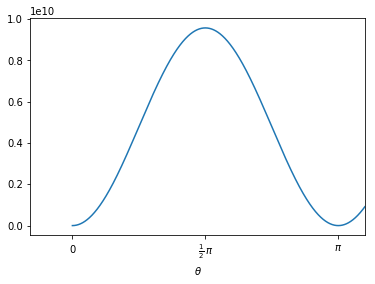

In [17]:
plt.plot(theta, new_nenner(E, me, theta))
plt.xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2,  2 * np.pi],
           [r"$0$", r"$\frac{1}{2}\,\pi$", r"$\pi$", r"$\frac{3}{2}\,\pi$", r"$2\pi$"])

plt.xlabel(r'$\theta$')
plt.xlim(-0.5, 1.1*np.pi)


Führe weiterhin den neuen differentien Quotienten ein

In [18]:
def new_differential_crosssection(energy, electron_mass, theta):
    alpha = 1 / 137
    s = 4*energy**2
    gamma = energy / electron_mass
    
    return alpha**2 / s * ( ( gamma**2 * (2 + np.sin(theta)**2 ) ) / ( gamma**2 *np.sin(theta)**2 + np.cos(theta)
 ) ) 
    

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


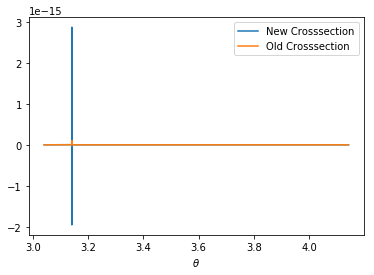

In [19]:
theta = np.linspace(np.pi-0.1,np.pi+1,2e6)
plt.clf()
plt.plot(theta,new_differential_crosssection(E, me, theta), label = 'New Crosssection')
plt.plot(theta, differntial_crosssection(E, beta(E, me), theta), label ='Old Crosssection')

plt.xlabel(r'$\theta$')
plt.legend()
#plt.yscale('log')
plt.savefig('./results/A2_test.pdf')


### Aufgabenteil c)

Die Konditionszahl einer Funktion $f(x)$ ist definiert als:
$$
K(x)=\left|\,x\,\frac{f'(x)}{f(x)}\,\right|
$$

Aus der Quotientenregel folgt für $\sigma'$:
$$
\sigma'=\frac{\alpha^2}{s}\frac{2\sin(\theta)\cos(\theta)(-3\beta^2+1)}{\left(1-\beta^2\cos^2(\theta)\right)^2}
$$

In [20]:
def derivation_differntial_crosssection(energy, beta, theta):
    alpha = 1/137
    s = 4 * energy**2
    
    return alpha**2 / s *  ( (2*np.sin(theta)*np.cos(theta) * (-3*beta**2+1) )/( (1-beta**2*np.cos(theta)**2)**2 ) )
    

In [27]:
theta = np.linspace(0,2*np.pi, 5e6)
theta

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


array([0.00000000e+00, 1.25663731e-06, 2.51327463e-06, ...,
       6.28318279e+00, 6.28318405e+00, 6.28318531e+00])

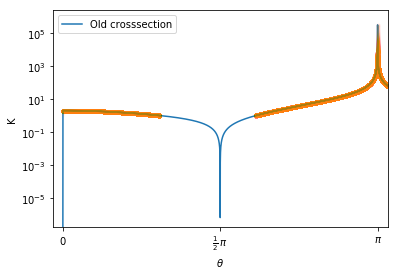

In [28]:
K = np.abs(theta * derivation_differntial_crosssection(E, beta(E,me), theta)/differntial_crosssection(E, beta(E,me), theta))


plt.plot(theta,K, label = 'Old crosssection' )

plt.xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2,  2 * np.pi],
           [r"$0$", r"$\frac{1}{2}\,\pi$", r"$\pi$", r"$\frac{3}{2}\,\pi$", r"$2\pi$"])
plt.xlim(-0.1,np.pi+0.1)
plt.xlabel(r'$\theta$')
plt.ylabel('K')
plt.yscale('log')
plt.legend()

plt.plot(theta[K>1][::2],K[K>1][::2],'.', alpha=0.01)

Der obige Plot zeigt in orange die Bereiche die eine schlechte Konditionierung respektive 
$K>1$ besitzen. Der blaue Bereich ist gut Konditioniert $K<1$.

## Aufgabe 3

Bestimmte zunächst die Nomierung $N$.
$$
\begin{aligned}
1&=\int_{0}^{\infty}N\mathrm{exp}\left(-\frac{mv^2}{2\mathrm{k_B}T}\right)4\pi v^2 \mathrm{d}v \\
&=4N\pi\int_{0}^{\infty}\left(\mathrm{exp}\left(-\Gamma v^2\right)v\right) v \mathrm{d}v \\
\mathrm{Partielle \,Integration}\\
&=4N\pi\left( \left[ -\frac{1}{2\Gamma}\mathrm{exp}\left(-\Gamma v^2\right)v\right]_{0}^{\infty} + \frac{1}{2\Gamma}\int_{0}^{\infty}\mathrm{exp}\left(-\Gamma v^2\right)\mathrm{d}v\right) \\
&=N\sqrt{\frac{\pi^3}{\Gamma^3}}\\
\Leftrightarrow\quad N &= \left(\frac{m}{2\mathrm{k_B}T\pi}\right)^{\frac{3}{2}}
\end{aligned}
$$

### Aufgabenteil a) 
#### Die wahrscheinlichste Geschwindigkeit $v_m$

Der Wert $v_m$ kann berechnet werden, indem der Hochpunkt der Verteilung $f(v)$ gesucht wird:
$$
f'(v_m)\overset{!}{=}0
$$

Dazu die Ableitung der Verteilung:
$$
f'(v) = 8\pi N \mathrm{exp}\left(-\Gamma v^2\right)v\left(1-v^2\Gamma\right)
$$
Daraus folgt mit der obigen Extremalbedingung für $v_m$:
$$
v_m = \pm \sqrt{\frac{1}{\Gamma}} = \pm \sqrt{\frac{2\mathrm{k_b}T}{m}}
$$
Der Definitionsbereich der Geschwindigkeit ist $v\in\mathbb{R}^+$, deshalb wird nur die positive Lösung betrachtet.

### Aufgabenteil b)
#### Der Mittelwert $\left<v\right>$

Der Mittelwert einer Verteilung kann im allgemein über die erste Kommulante bestimmt werden:

$$
\left<v\right> = \int v \,f(v)\mathrm{d}v
$$

$$
\begin{aligned}
\left<v\right> &= 4\pi N \int_{0}^{\infty} v^3 \exp\left(-\Gamma v^2\right)\mathrm{d}v \\
&=4\pi N \left( \left[\frac{-v^2}{2\Gamma} \exp(-\Gamma v^2)\right]_{0}^{\infty} + \frac{1}{\Gamma}\int_{0}^{\infty} v\exp(-\Gamma v^2) \mathrm{d}v \right)\\
&=4\pi N \left[-\frac{1}{2\Gamma^2} \exp(-\Gamma v^2)\right]_{0}^{\infty}\\
&= \frac{2\pi N}{\Gamma^2} = \frac{2}{\sqrt{\pi}} v_m
\end{aligned}
$$

### Aufgabenteil c)
#### Bestimmung des Medians $v_{0,5}$

Berechnet werden kann der Median wie folgt:

$$
\int_{0}^{v_{0,5}} f(v)\mathrm{d}v = \frac{1}{2}
$$

Die Lösung der folgenden Aufgabe orrientiert sich an diesem [Paper](https://pubs.acs.org/doi/abs/10.1021/ed061p979?journalCode=jceda8).

$$
\begin{aligned}
\frac{1}{2} &=\int_{0}^{v_{0,5}} 4\pi N v^2 \exp\left(-v^2/v_m\right) \mathrm{d}v \\
&= \frac{4}{\sqrt{\pi}v_m} \int_{0}^{v_{0,5}} \frac{v^2}{v_m^2}\exp\left(-\frac{v^2}{v_m^2}\right)\mathrm{d}v\\
\text{Substitution: } \qquad  s&:=\frac{v}{v_m},\quad v_m\mathrm{d}s=\mathrm{d}v\\
\frac{1}{2}&=\frac{4}{\sqrt{\pi}}\int_{0}^{s_{0,5}}s^2\exp\left(-s^2\right)\mathrm{d}s\\
\Leftrightarrow \qquad \frac{\sqrt{\pi}}{8}&=\left[\frac{-s}{2}\exp\left(-s^2\right)\right]_0^{s_{0,5}} + \frac{1}{2}\int_{0}^{s_{0,5}} \exp\left(-s^2\right)\mathrm{d}s\\
    &=\frac{-s_{0,5}}{2}\exp\left(-s_{0,5}^2\right)+\frac{\sqrt{\pi}}{4}\mathrm{erf}\left(s_{0,5}\right)\\
\Rightarrow \qquad g(s_{0,5})&:=\mathrm{erf}(s_{0,5})-\frac{2}{\sqrt{\pi}}s_{0,5}\exp\left(-s_{0,5}^2\right) - \frac{1}{2} = 0
\end{aligned}
$$

Bestimmte numerisch die Nullstelle der Funktion $g(s_{0,5})$.


In [44]:
def function(s):
    return scipy.special.erf(s) - 2/np.sqrt(np.pi) * s * np.exp(-s**2) - 1/2  

nullstelle = newton(function,1)

print('Die Nullstelle der Funktion g liegt bei:', nullstelle)

Die Nullstelle der Funktion g liegt bei: 1.0876520317581668


Mit Hilfe der Nullstelle kann der Median allgemein über die Relation 
$$
\begin{aligned}
s_{0,5}&=\frac{v_{0,5}}{v_m}\\
\Leftrightarrow \qquad v_{0,5} &=s_{0,5}\,v_m \approx 1.088\,v_m
\end{aligned}
$$